# Portfolio Project: Online Retail Exploratory Data Analysis with Python

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### First Let's Load The Data

In [3]:
df = pd.read_csv("Online Retail.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Checking the Types

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Cleaning The Data

### First Let's Check For Null Values

In [6]:
df.shape

(541909, 8)

We Can Notice That The Total Value for each column is 541909

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


 While Description and CustomerID Has Some Of their Values are Null Values Let's Clean Them

In [8]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [9]:
df.dropna(subset=['CustomerID'],inplace=True)

In [10]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Now The CustomerID Column Is Cleaned Let's Check For the Description

In [11]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Both Cleaned

### Double Checking For The Null Values

In [12]:
df.shape

(406829, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


All Null Vlues Have Been Removed

## Let's Check For Duplicates

In [14]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### After Removing Duplicate Data And Null Values The Data is Finally Clean

### Create Seperate Year, Month and Day Columns

In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [18]:
df['Year'] = df['InvoiceDate'].dt.strftime('%Y').astype(int)
df['Month'] = df['InvoiceDate'].dt.strftime('%m')
df['Day'] = df['InvoiceDate'].dt.strftime('%d')

## Now Let's Check The Outliers of Data

### A Quick Look At The Data Statistics

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,2010.934378
std,250.283037,69.764035,1714.006089,0.247620
min,-80995.000000,0.000000,12346.000000,2010.000000
25%,2.000000,1.250000,13939.000000,2011.000000
50%,5.000000,1.950000,15145.000000,2011.000000
75%,12.000000,3.750000,16784.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,2011.000000


if we look close enough, it's noticeable that the Quantity Has Outliers in min and max values as UnitPrice Max Value

## let's Check The Outliers In the UnitPrice And Quantity

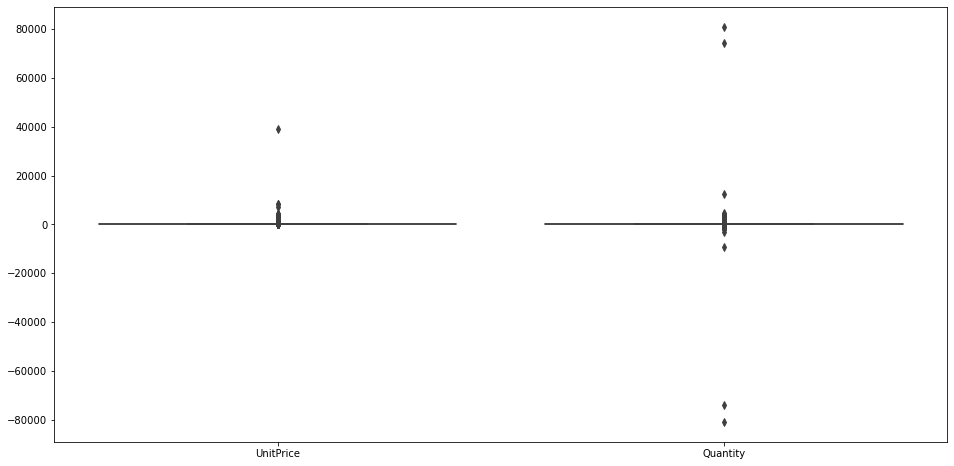

In [20]:
plt.figure(figsize=(16,8))

sns.boxplot(data=df[['UnitPrice','Quantity']])

The Data Obviously Has Huge Amount Of outliers that needs to be removed or corrected

## Cleaning The Outliers

In [21]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

### first the Quantity

In [22]:
quantity = df[df['Quantity'] >0]['Quantity']
min(find_outliers_IQR(quantity))

28

the first outlier above 0 is 28

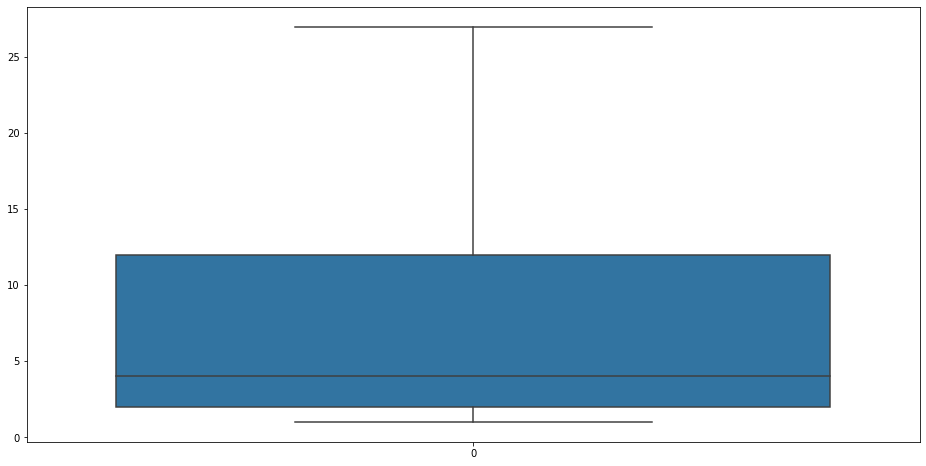

In [23]:
clean = df[df['Quantity']< 28]
clean = clean[df['Quantity']> 0]
plt.figure(figsize=(16,8))
sns.boxplot(data=clean['Quantity'])

### second the UnitPrice

In [24]:
min(find_outliers_IQR(df['UnitPrice']))

7.6

the first outlier for UnitPrice is 7.6

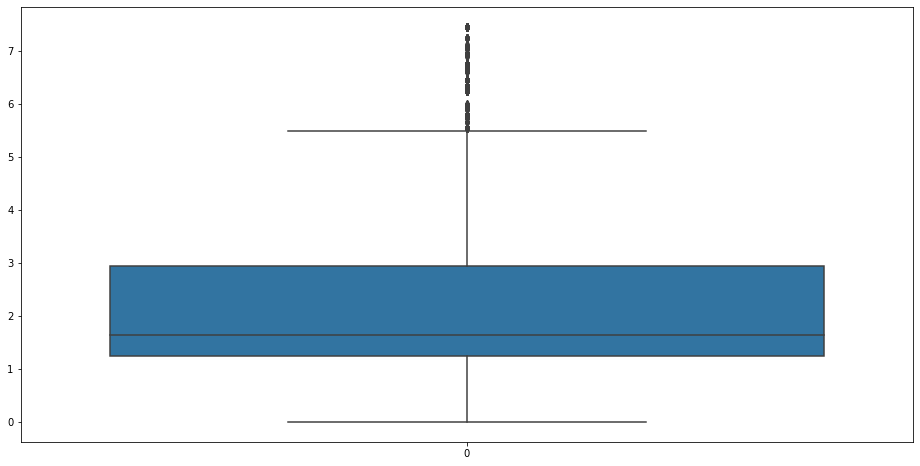

In [25]:
clean = clean[df['UnitPrice']< 7.5]
plt.figure(figsize=(16,8))
sns.boxplot(data=clean['UnitPrice'])

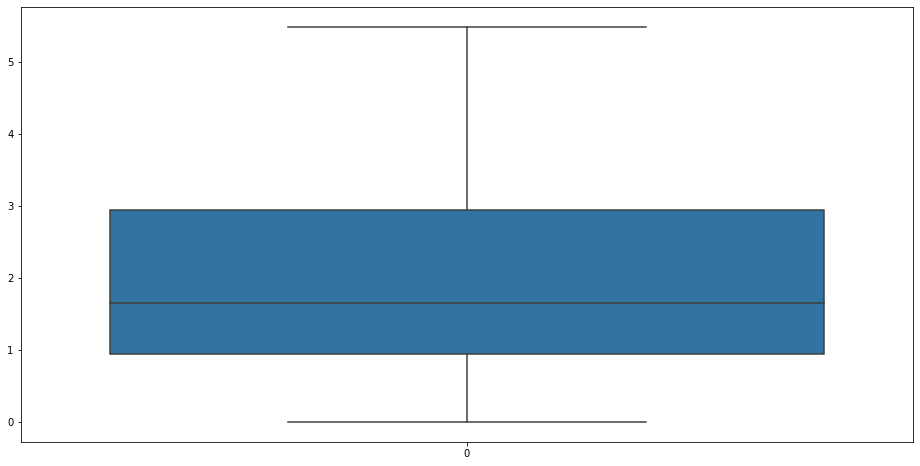

In [26]:
clean = clean[df['UnitPrice']< 5.5]
plt.figure(figsize=(16,8))
sns.boxplot(data=clean['UnitPrice'])

### Double Checking Both

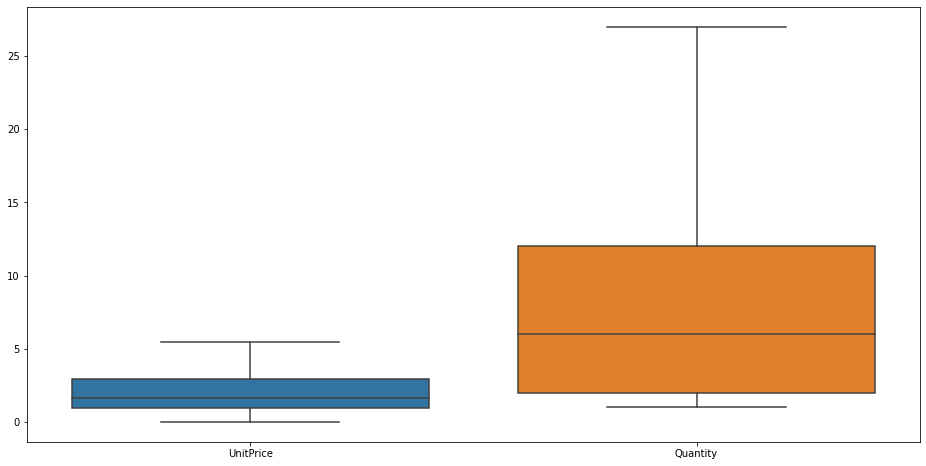

In [27]:
plt.figure(figsize=(16,8))

sns.boxplot(data=clean[['UnitPrice','Quantity']])

now the data has no outliers

In [28]:
clean.describe()

,Quantity,UnitPrice,CustomerID,Year
count,318025.000000,318025.000000,318025.000000,318025.000000
mean,7.728804,1.997575,15321.410609,2010.935103
std,6.834203,1.284375,1713.715621,0.246345
min,1.000000,0.000000,12347.000000,2010.000000
25%,2.000000,0.950000,13985.000000,2011.000000
50%,6.000000,1.650000,15241.000000,2011.000000
75%,12.000000,2.950000,16818.000000,2011.000000
max,27.000000,5.490000,18287.000000,2011.000000


# Data Analysis

## Cheking Total Items Sold By Month

### First Creating Grouped Data Relatable to our target

In [29]:
total_items_monthly = clean.groupby("Month")['Quantity'].sum().reset_index()

### now visualizing it using line plot 

Text(0.5, 1.0, 'Total Items Sold By Month')

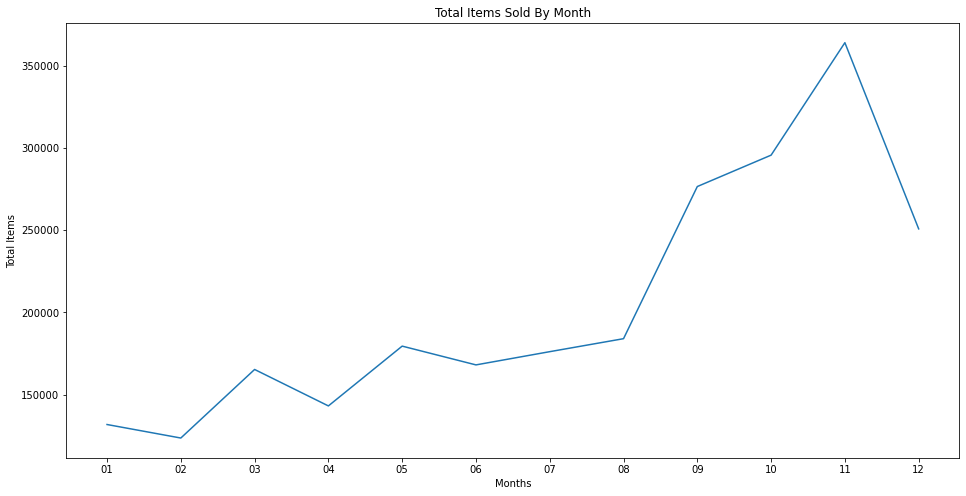

In [30]:
plt.figure(figsize=(16,8))
sns.lineplot(data=total_items_monthly,x='Month',y='Quantity')

plt.xlabel('Months')
plt.ylabel('Total Items')
plt.title('Total Items Sold By Month')

we can cleary identify the peak on november total sales and february has the lowest sales

## Let's See How Much Money Spent on the items By Month

### first let's calculate the required data

In [31]:
clean['Total_Price'] = clean['Quantity'] * clean['UnitPrice']

### let's group the targeted data

In [32]:
total_price_monthly = clean.groupby("Month")['Total_Price'].sum().reset_index()

Text(0.5, 1.0, 'Total Money Spent By Month')

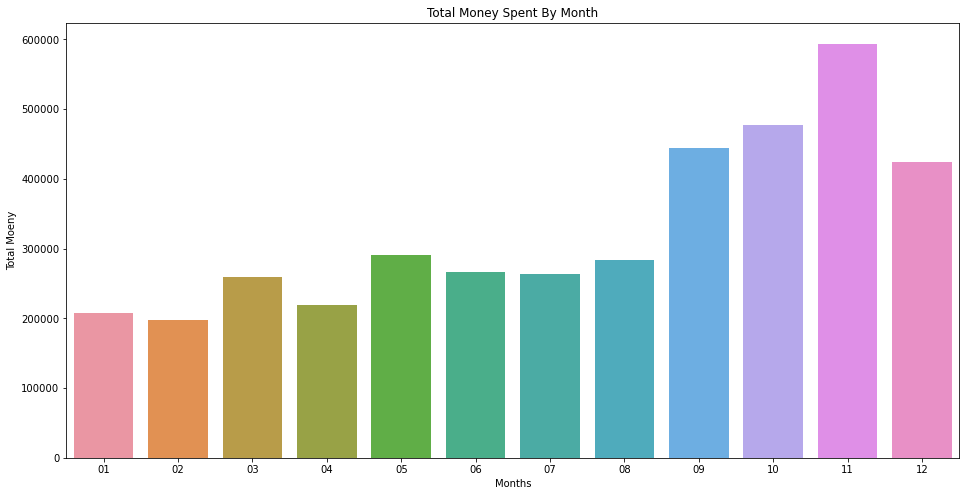

In [33]:
plt.figure(figsize=(16,8))

sns.barplot(data=total_price_monthly,x='Month',y='Total_Price')

plt.xlabel('Months')
plt.ylabel('Total Moeny')
plt.title('Total Money Spent By Month')

this chart confirms that november was the highest active month while february was the least

### Creating Bins For The Unit Price

In [34]:
bins= np.linspace(min(clean['UnitPrice']),max(clean['UnitPrice']),4)
group_names=['Low Price','Fair Price','High Price']
clean['Binned_Unit_Price']= pd.cut(clean['UnitPrice'],bins,labels=group_names, include_lowest= True)
clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Total_Price,Binned_Unit_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,01,15.30,Fair Price
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34,Fair Price
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,01,22.00,Fair Price
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34,Fair Price
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34,Fair Price


Text(0.5, 1.0, 'Total Item Sold Percent By Price Range')

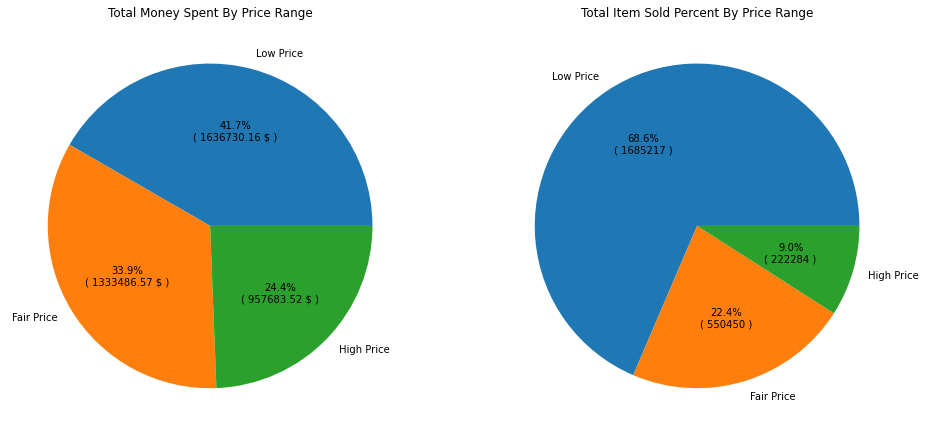

In [35]:
total_items = clean.groupby('Binned_Unit_Price')['Quantity'].sum().reset_index()
total_price = clean.groupby('Binned_Unit_Price')['Total_Price'].sum().reset_index()

def func_price(pct, allvalues):
    absolute = float(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n( {:.2f} $ )".format(pct, absolute)

plt.figure(figsize=(16,9))

plt.subplot(1,2,1)

plt.pie(total_price['Total_Price'],
        labels= group_names,
        autopct=lambda pct: func_price(pct, total_price['Total_Price']))

plt.title("Total Money Spent By Price Range")


def func_items(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n( {:d} )".format(pct, absolute)
 
plt.subplot(1,2,2)

plt.pie(total_items['Quantity']
        ,labels= group_names,
        autopct=lambda pct: func_items(pct, total_items['Quantity']))
plt.title("Total Item Sold Percent By Price Range")


from the both charts it's identifiable that the great majorty of sales and items sold are in the low price range

## let's identify the highest Paying Customer

In [36]:
customer = clean.groupby('CustomerID')['Total_Price'].sum().reset_index()
customer.sort_values(by='Total_Price',inplace=True, ascending=False)
customer.head(20)

,CustomerID,Total_Price
1821,14911.0,77777.89
542,13089.0,32918.58
3873,17841.0,28928.89
1245,14096.0,27211.04
1386,14298.0,23848.93
324,12748.0,18994.88
538,13081.0,16778.48
1287,14156.0,14123.81
2106,15311.0,13818.26
1904,15039.0,12792.67


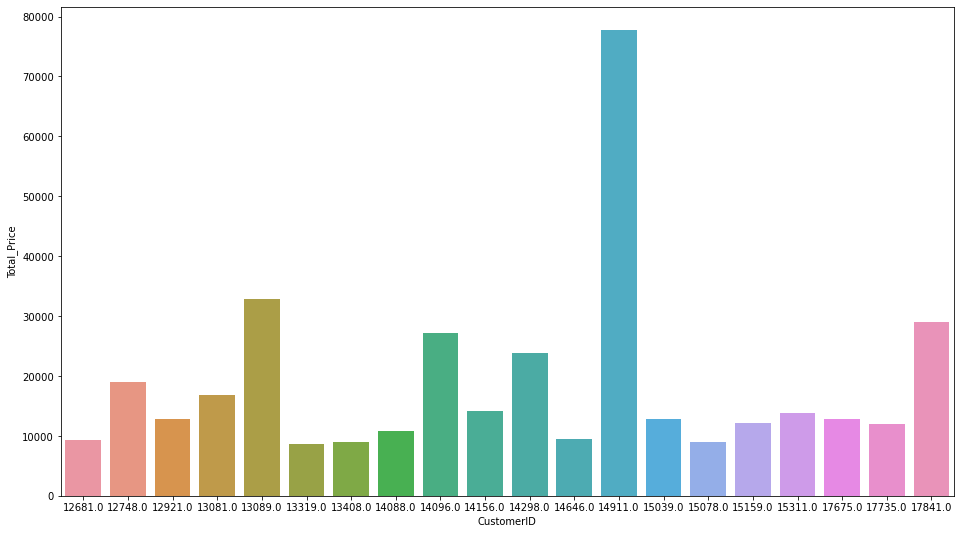

In [37]:
plt.figure(figsize=(16,9))
sns.barplot(data= customer.head(20),x='CustomerID',y='Total_Price')

we can use the chart above and the list to make specific offers for these customers or identify how to target these users who are well likely to spend more money on shopping

## Identifying The top-selling Products 

In [49]:
items =clean.groupby('Description')[['Total_Price','Quantity']].sum().reset_index()
by_quantity= items.sort_values(by='Quantity',ascending=False)
by_quantity.head(5)

,Description,Total_Price,Quantity
2010,PACK OF 72 RETROSPOT CAKE CASES,8277.68,14986
185,ASSORTED COLOUR BIRD ORNAMENT,22940.06,13574
1554,JUMBO BAG RED RETROSPOT,24923.50,12167
3246,WHITE HANGING HEART T-LIGHT HOLDER,31682.70,10770
1712,LUNCH BAG RED RETROSPOT,16194.80,9776


In [50]:
by_price= items.sort_values(by='Total_Price',ascending=False)
by_price.head(5)

,Description,Total_Price,Quantity
2073,PARTY BUNTING,34952.85,7089
3246,WHITE HANGING HEART T-LIGHT HOLDER,31682.70,10770
1554,JUMBO BAG RED RETROSPOT,24923.50,12167
2946,SPOTTY BUNTING,23513.05,4755
185,ASSORTED COLOUR BIRD ORNAMENT,22940.06,13574


 from the two lists above we can identify that the most selling products are
 [ PACK OF 72 RETROSPOT CAKE CASES, ASSORTED COLOUR BIRD ORNAMENT, JUMBO BAG RED RETROSPOT, WHITE HANGING HEART T-LIGHT HOLDER and LUNCH BAG RED RETROSPOT ].

 while the most profitable products are
 [ PARTY BUNTING, WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT, SPOTTY BUNTING and ASSORTED COLOUR BIRD ORNAMENT ]

Text(0, 0.5, 'Products')

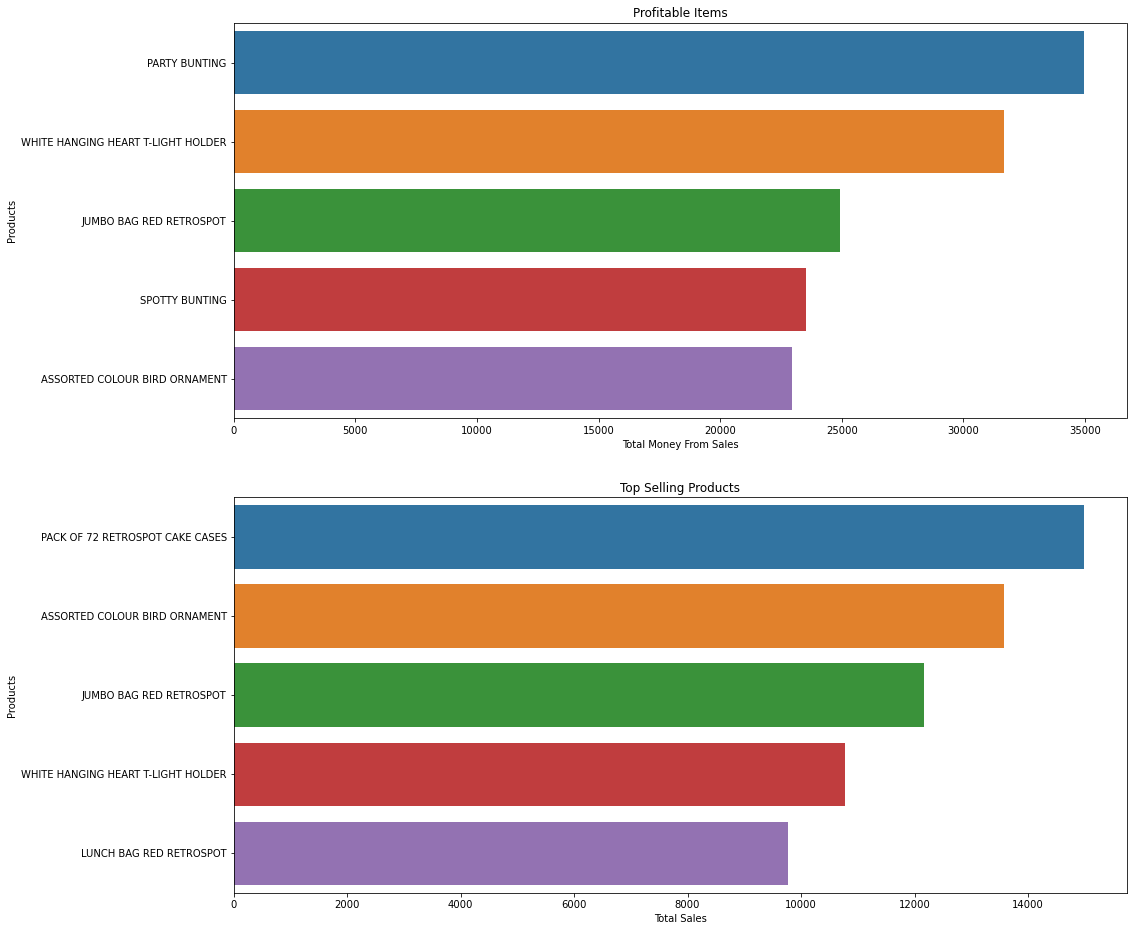

In [73]:
plt.figure(figsize=(16,16))
plt.subplot(2,1,1)
sns.barplot(data=by_price.head(5),
           y= 'Description',
           x='Total_Price',
           orient = 'h')
plt.title('Profitable Items')
plt.xlabel('Total Money From Sales')
plt.ylabel('Products')

plt.subplot(2,1,2)
sns.barplot(data=by_quantity.head(5),
           y= 'Description',
           x='Quantity',
           orient = 'h')
plt.title('Top Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Products')

# Conclusion

○ Initiated Data Cleaning, Analyzing and Visualization using proper tools and analytical skills.

###  Deployed Improved Data Analysis which led to the next findings
- November Has The highest Sales While February Has the least.
- Coming Closer the new year sales was expected to rise but On the contrary the sales dropped ond december.
- Products In the fair price range was the most sold and the highest total money spent on.
- Identified the top selling products as well as the most profitable
- there are specific customers are willing to pay alot of money on shopping.

### .Thank You

## .Author

# Ahmed A. Elatwy